#### Loading and Exploring COCO annotations

In [5]:
from pycocotools.coco import COCO
import os

In [6]:
# path to the annotation file
ANNOTATION_PATH = '../data/coco/annotations/instances_train2017.json'

In [7]:
# initialize coco api
coco = COCO(ANNOTATION_PATH)

loading annotations into memory...
Done (t=7.86s)
creating index...
index created!


In [13]:
# load all categories
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
print(f"COCO Categories ({len(categories)}): {category_names}")

COCO Categories (80): ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
# Load all images
image_ids = coco.getImgIds()
print(f"Total Images: {len(image_ids)}")

Total Images: 118287


#### Visualizing an Image with Segmentations

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [16]:
# Select a random image
image_id = image_ids[0]
image_info = coco.loadImgs(image_id)[0]

In [20]:
# Load the image
image_path = os.path.join('../data/coco/images/train2017', image_info['file_name'])
image = Image.open(image_path)

In [22]:
# Load annotations for the image
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

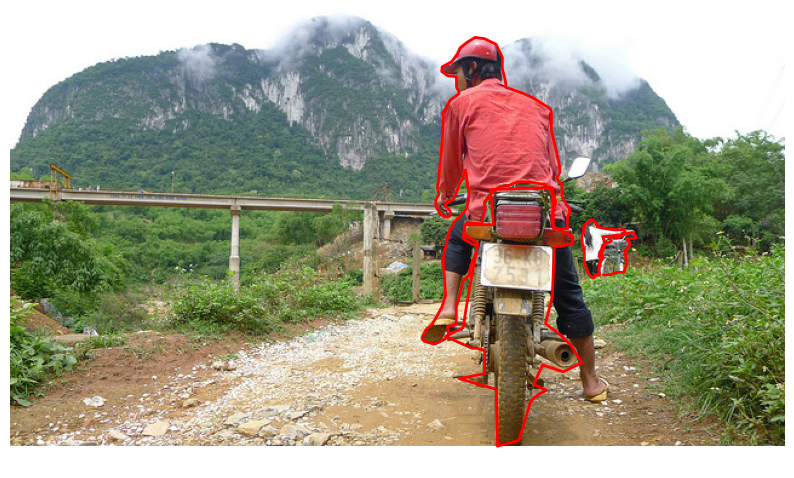

In [27]:
# Plot the image with segmentations
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

# Overlay segmentations
for ann in annotations:
    segmentation = np.array(ann['segmentation'][0]).reshape(-1, 2)  # Polygon points
    plt.plot(segmentation[:, 0], segmentation[:, 1], color='red', linewidth=2)

plt.show()